# Delivery_time -> Predict delivery time using sorting time 


In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import warnings
plt.rcParams['figure.figsize']=(10,5)
plt.rcParams['figure.dpi']=(150)
%matplotlib inline
sns.set_theme(style='darkgrid',palette='turbo_r')
warnings.filterwarnings('ignore')

In [47]:
df=pd.read_csv('delivery_time.csv')

In [48]:
df

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [49]:
df.dtypes

Delivery Time    float64
Sorting Time       int64
dtype: object

In [50]:
df.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [51]:
df.rename(columns={'Sorting Time':'Sorting_Time','Delivery Time':'Delivery_Time'},inplace=True)

<Axes: xlabel='Sorting_Time', ylabel='Delivery_Time'>

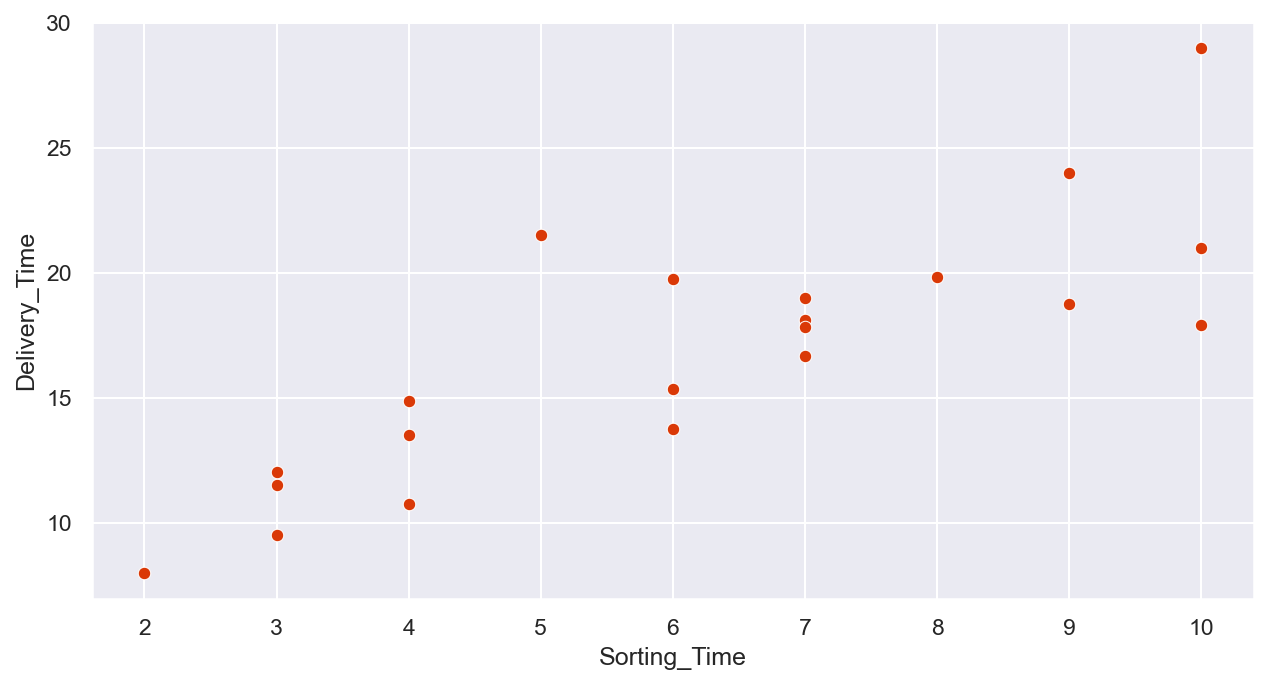

In [52]:
sns.scatterplot(x=df['Sorting_Time'],y=df['Delivery_Time'])

<Axes: >

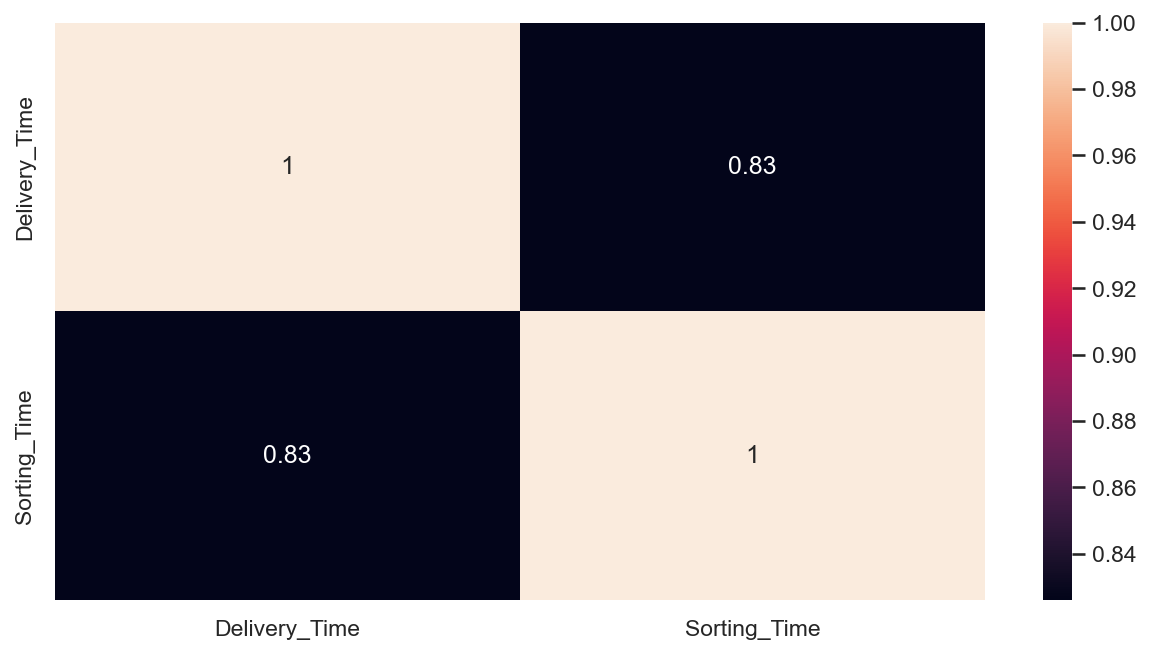

In [53]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

In [54]:
df.head()

,Delivery_Time,Sorting_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [55]:
model = smf.ols(formula='Delivery_Time ~ Sorting_Time',data=df).fit()
model

In [56]:
print(model.params)

Intercept       6.582734
Sorting_Time    1.649020
dtype: float64


In [57]:
model.rsquared

0.6822714748417231

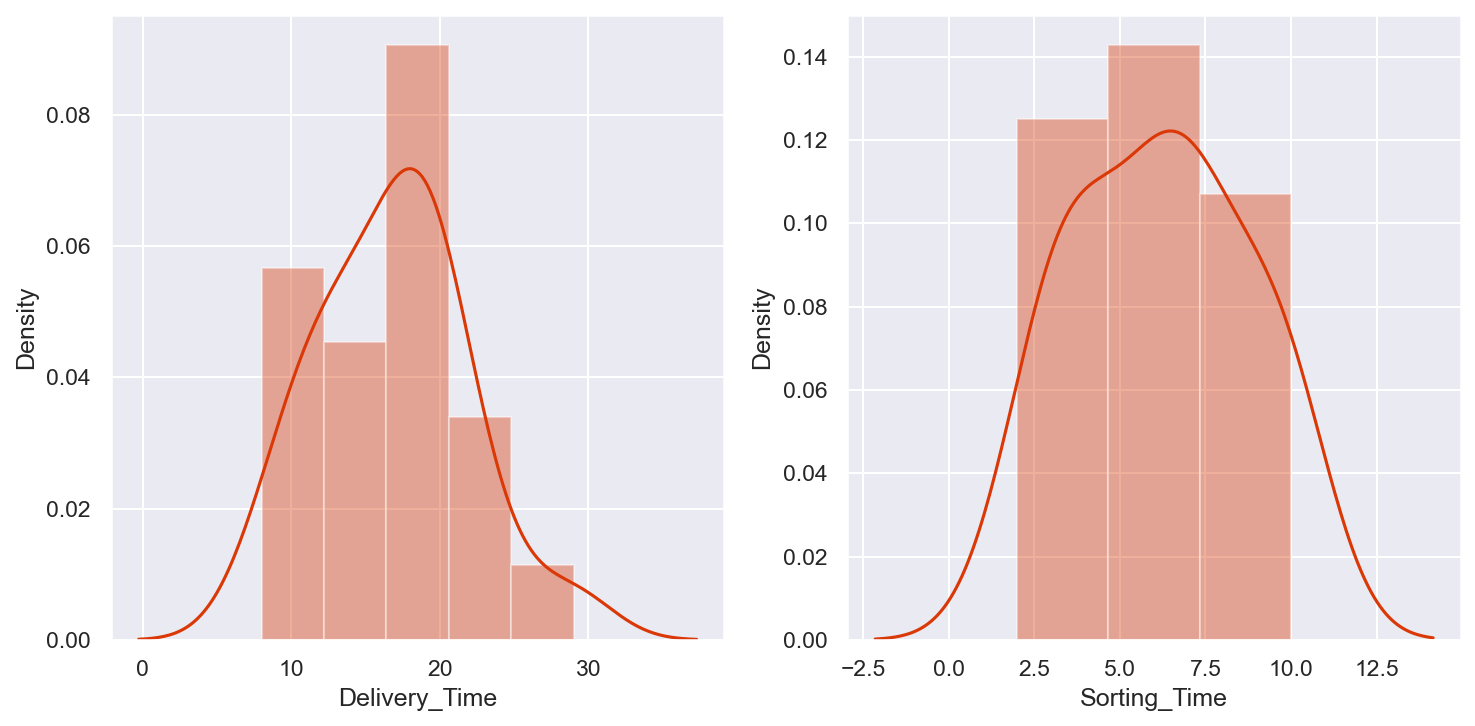

In [75]:
fig,index=plt.subplots(1,2)
sns.distplot(df['Delivery_Time'],ax=index[0])
sns.distplot(df['Sorting_Time'],ax=index[1])
plt.tight_layout()

In [77]:
df['Delivery_Time'].skew()

0.3523900822831107

In [78]:
df['Sorting_Time'].skew()

0.047115474210530174

# Data Transformation

# 1.Log Transformation

In [80]:
df['Log_of_Delivery_Time']=np.log(df['Delivery_Time'])
df['Log_of_Sorting_Time']=np.log(df['Sorting_Time'])
df

,Delivery_Time,Sorting_Time,Log_of_Delivery_Time,Log_of_Sorting_Time
0,21.00,10,3.044522,2.302585
1,13.50,4,2.602690,1.386294
2,19.75,6,2.983153,1.791759
3,24.00,9,3.178054,2.197225
4,29.00,10,3.367296,2.302585
5,15.35,6,2.731115,1.791759
6,19.00,7,2.944439,1.945910
7,9.50,3,2.251292,1.098612
8,17.90,10,2.884801,2.302585
9,18.75,9,2.931194,2.197225


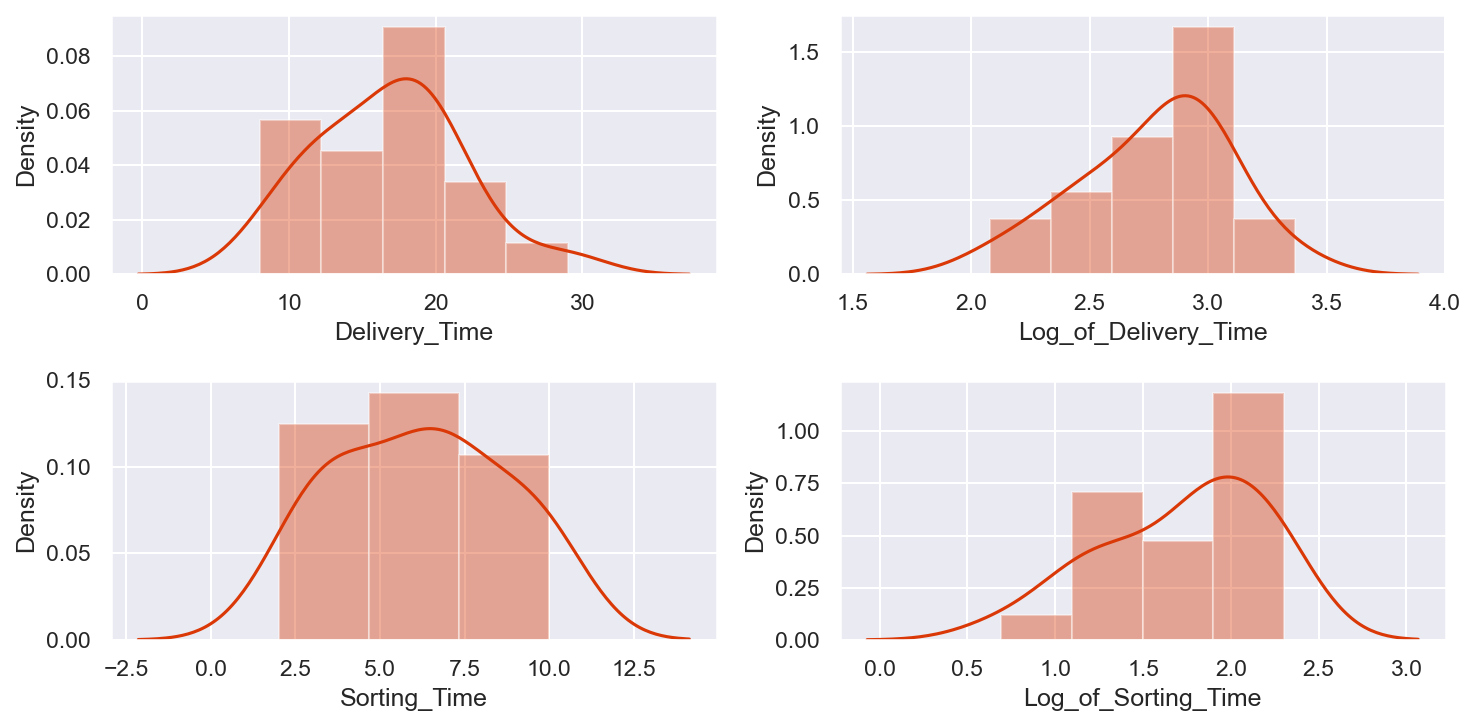

In [83]:
fig,index=plt.subplots(2,2)
sns.distplot(df['Delivery_Time'],ax=index[0,0])
sns.distplot(df['Log_of_Delivery_Time'],ax=index[0,1])
sns.distplot(df['Sorting_Time'],ax=index[1,0])
sns.distplot(df['Log_of_Sorting_Time'],ax=index[1,1])
plt.tight_layout()

# 2.sqrt Transforamtion

In [84]:
df['sqrt_Delivery_Time']=np.sqrt(df['Delivery_Time'])
df['sqrt_Sorting_Time']=np.sqrt(df['Sorting_Time'])
df

,Delivery_Time,Sorting_Time,Log_of_Delivery_Time,Log_of_Sorting_Time,sqrt_Delivery_Time,sqrt_Sorting_Time
0,21.00,10,3.044522,2.302585,4.582576,3.162278
1,13.50,4,2.602690,1.386294,3.674235,2.000000
2,19.75,6,2.983153,1.791759,4.444097,2.449490
3,24.00,9,3.178054,2.197225,4.898979,3.000000
4,29.00,10,3.367296,2.302585,5.385165,3.162278
5,15.35,6,2.731115,1.791759,3.917908,2.449490
6,19.00,7,2.944439,1.945910,4.358899,2.645751
7,9.50,3,2.251292,1.098612,3.082207,1.732051
8,17.90,10,2.884801,2.302585,4.230839,3.162278
9,18.75,9,2.931194,2.197225,4.330127,3.000000


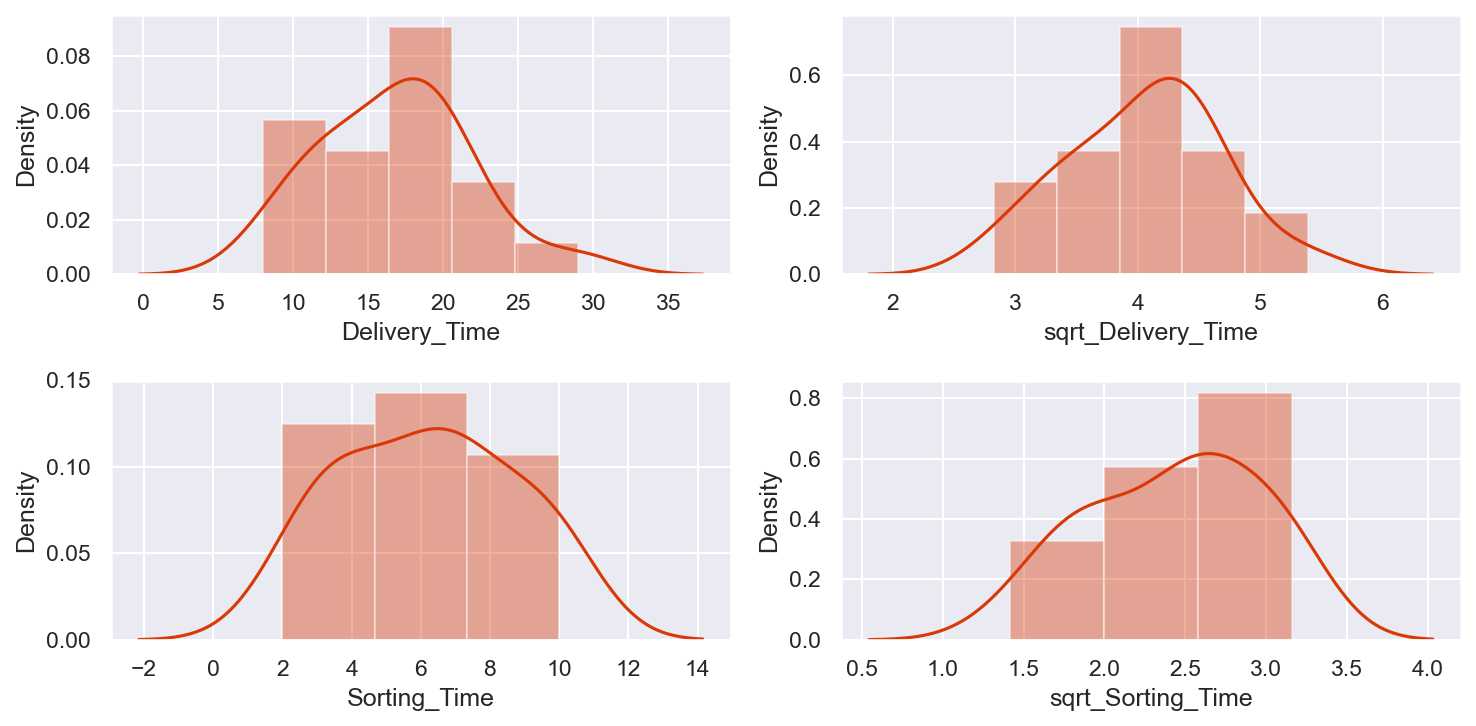

In [99]:
fig,index=plt.subplots(2,2)
sns.distplot(df['Delivery_Time'],ax=index[0,0])
sns.distplot(df['sqrt_Delivery_Time'],ax=index[0,1])
sns.distplot(df['Sorting_Time'],ax=index[1,0])
sns.distplot(df['sqrt_Sorting_Time'],ax=index[1,1])
plt.tight_layout()

In [14]:
test=pd.DataFrame({
    'Sorting_Time':[2.5,3.5,4.5,5.5,6.5,2,5,10,9,7,8,6]
})

In [15]:
test

,Sorting_Time
0,2.5
1,3.5
2,4.5
3,5.5
4,6.5
5,2.0
6,5.0
7,10.0
8,9.0
9,7.0


In [16]:
predicted_delivery_time=model.predict(test)

In [17]:
print(predicted_delivery_time)

0     10.705284
1     12.354304
2     14.003324
3     15.652343
4     17.301363
5      9.880774
6     14.827833
7     23.072933
8     21.423913
9     18.125873
10    19.774893
11    16.476853
dtype: float64
